In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split # Changed train_selection to train_test_split
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.utils import shuffle

**DATASET BALANCING USING PANDAS**

In [1]:
import pandas as pd

# URL of the CSV file
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data"

# Define column names (since the original file doesn't have them)
column_names = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym',
                'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']

# Read the CSV file from the URL into a pandas DataFrame
df = pd.read_csv(url, names=column_names)

# Display the DataFrame
df

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


In [3]:
classG=df[df['class']== 'g' ]
classH=df[df['class']== 'h' ]
countG, countH = df['class'].value_counts()

In [4]:
classGUnder = classG.sample(countH)
newDataset = pd.concat([classGUnder, classH], axis=0)
newDataset.to_csv('balanced_dataset.csv',index=False)
# df1=pd.read_csv( 'balanced_dataset.csv' )
# df1

# **Reading Data without recreating it each time**

<Axes: >

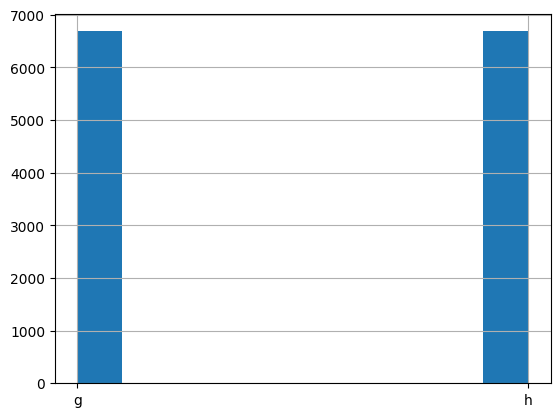

In [5]:
newDataset = pd.read_csv('balanced_dataset.csv')
newDataset['class'].hist()

**Data Split**

In [6]:
x = newDataset.drop('class', axis=1) # 1 for column, 0 for index
y = newDataset['class'] # Remove the trailing comma to avoid creating a tuple

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

**IMPORTING MODELS**

In [7]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.preprocessing import StandardScaler

**STANDARDIZE THE FEATURES**

In [8]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

**BUILDING THE MODEL**


---
We will Build the Neural Network Model using the Keras API in TensorFlow.


**MODEL ARCHITECTURE**

---

Model: "sequential"


*   The Model consists of three layers: two hidden layer and one output layer
*   The input layer takes in the 10 features from our dataset






In [9]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(x_train.shape[1],)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
loss_functions = {
    'binary_crossentropy': 'binary_crossentropy',
    'hinge': 'hinge',
    'focal_loss' : 'binary_crossentropy' #Placeholder for focal loss
    }

In [11]:
def focal_loss(gamma=2.0, alpha=0.25):
    def focal_loss_fixed(y_true, y_pred):
        epsilon = tf.keras.backend.epsilon()
        y_pred = tf.clip_by_value(y_pred, epsilon, 1. - epsilon)
        cross_entropy = -y_true * tf.math.log(y_pred)
        loss = alpha * tf.pow(1 - y_pred, gamma) * cross_entropy
        return tf.reduce_mean(tf.reduce_sum(loss, axis=1))
    return focal_loss_fixed

**Neural Network using TensorFlow**

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data"
column_names = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym',
                'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']
data = pd.read_csv(url, header=None, names=column_names)

# Preprocess the data
data['class'] = data['class'].map({'g': 1, 'h': 0})  # Convert class labels to binary
X = data.drop('class', axis=1)
y = data['class']

# Split the dataset into majority and minority classes
classG = data[data['class'] == 1]
classH = data[data['class'] == 0]

# Balance the dataset by undersampling the majority class
countH = len(classH)
classGUnder = classG.sample(countH)
newDataset = pd.concat([classGUnder, classH], axis=0)

# Split the balanced dataset
X = newDataset.drop('class', axis=1)
y = newDataset['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the model
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model with different loss functions
loss_functions = {
    'binary_crossentropy': 'binary_crossentropy',
    'hinge': 'hinge',
    'focal_loss': focal_loss(gamma=2.0, alpha=0.25)  # Use the custom focal loss function
}

# Custom focal loss function
def focal_loss(gamma=2.0, alpha=0.25):
    def focal_loss_fixed(y_true, y_pred):
        epsilon = tf.keras.backend.epsilon()
        y_pred = tf.clip_by_value(y_pred, epsilon, 1. - epsilon)
        cross_entropy = -y_true * tf.math.log(y_pred)
        loss = alpha * tf.pow(1 - y_pred, gamma) * cross_entropy
        return tf.reduce_mean(tf.reduce_sum(loss, axis=1))
    return focal_loss_fixed

# Train and evaluate the model with different loss functions
for loss_name, loss_function in loss_functions.items():
    print(f"Training with loss function: {loss_name}")

    model.compile(optimizer='adam', loss=loss_function, metrics=['accuracy'])

    model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    print(f"Test accuracy with {loss_name}: {test_accuracy:.4f}\n")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training with loss function: binary_crossentropy
Epoch 1/10
268/268 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7549 - loss: 0.4912 - val_accuracy: 0.8308 - val_loss: 0.3768
Epoch 2/10
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8387 - loss: 0.3752 - val_accuracy: 0.8210 - val_loss: 0.3806
Epoch 3/10
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8406 - loss: 0.3597 - val_accuracy: 0.8369 - val_loss: 0.3622
Epoch 4/10
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8499 - loss: 0.3539 - val_accuracy: 0.8449 - val_loss: 0.3496
Epoch 5/10
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8494 - loss: 0.3413 - val_accuracy: 0.8430 - val_loss: 0.3490
Epoch 6/10
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8527 - loss: 0.3346 - val_accuracy: 0.8355 - val_loss: 0.3550
Epoch 7/10
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8571 - loss: 0.3300 - val_accuracy: 0.8411 - val_loss: 0.3526
Epoch 8/10
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - a

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras import layers, models

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data"
column_names = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym',
                'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']
data = pd.read_csv(url, header=None, names=column_names)

# Preprocess the data
data['class'] = data['class'].map({'g': 1, 'h': 0})  # Convert class labels to binary
X = data.drop('class', axis=1)
y = data['class']

# Split the dataset into majority and minority classes
classG = data[data['class'] == 1]
classH = data[data['class'] == 0]

# Balance the dataset by undersampling the majority class
countH = len(classH)
classGUnder = classG.sample(countH)
newDataset = pd.concat([classGUnder, classH], axis=0)

# Split the balanced dataset
X = newDataset.drop('class', axis=1)
y = newDataset['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Custom focal loss function
def focal_loss(gamma=2.0, alpha=0.25):
    def focal_loss_fixed(y_true, y_pred):
        epsilon = tf.keras.backend.epsilon()
        y_pred = tf.clip_by_value(y_pred, epsilon, 1. - epsilon)
        cross_entropy = -y_true * tf.math.log(y_pred)
        loss = alpha * tf.pow(1 - y_pred, gamma) * cross_entropy
        return tf.reduce_mean(tf.reduce_sum(loss, axis=1))
    return focal_loss_fixed

# Build the model
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model with different loss functions
loss_functions = {
    'binary_crossentropy': 'binary_crossentropy',
    'hinge': 'hinge',
    'focal_loss': focal_loss(gamma=2.0, alpha=0.25)  # Use the custom focal loss function
}

# Train and evaluate the model with different loss functions
for loss_name, loss_function in loss_functions.items():
    print(f"Training with loss function: {loss_name}")

    model.compile(optimizer='adam', loss=loss_function, metrics=['accuracy'])

    model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    print(f"Test accuracy with {loss_name}: {test_accuracy:.4f}")

    # Get predictions
    y_pred_prob = model.predict(X_test)
    y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary predictions

    # Calculate precision, recall, and F1 score
    report = classification_report(y_test, y_pred, target_names=['Class H (0)', 'Class G (1)'], output_dict=True)

    precision = report['Class G (1)']['precision']
    recall = report['Class G (1)']['recall']
    f1_score = report['Class G (1)']['f1-score']

    print(f"Precision for Class G (1): {precision:.4f}")
    print(f"Recall for Class G (1): {recall:.4f}")
    print(f"F1 Score for Class G (1): {f1_score:.4f}\n")

Training with loss function: binary_crossentropy
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


268/268 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7505 - loss: 0.5076 - val_accuracy: 0.8243 - val_loss: 0.3819
Epoch 2/10
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8380 - loss: 0.3777 - val_accuracy: 0.8393 - val_loss: 0.3493
Epoch 3/10
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8415 - loss: 0.3608 - val_accuracy: 0.8421 - val_loss: 0.3521
Epoch 4/10
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8415 - loss: 0.3551 - val_accuracy: 0.8477 - val_loss: 0.3427
Epoch 5/10
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8507 - loss: 0.3448 - val_accuracy: 0.8369 - val_loss: 0.3517
Epoch 6/10
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8413 - loss: 0.3454 - val_accuracy: 0.8374 - val_loss: 0.3586
Epoch 7/10
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8494 - loss: 0.3342 - val_accuracy: 0.8435 - val_loss: 0.3369
Epoch 8/10
268/268 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8454 - loss: 0.3383 - val_accuracy: 0.8505 - val_

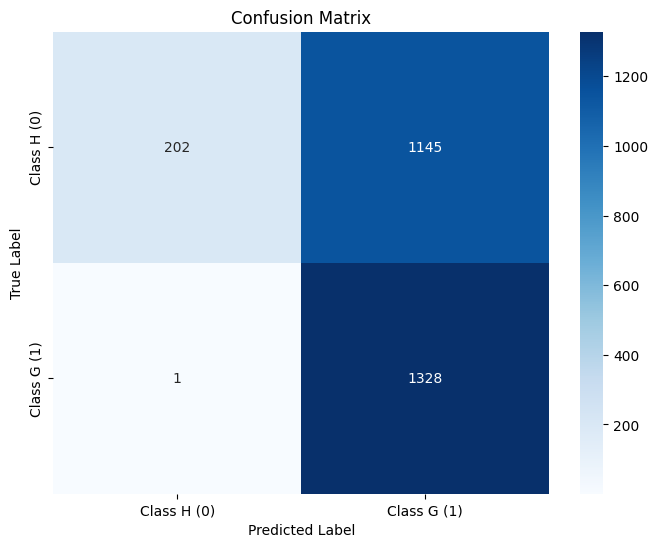

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are already defined from your previous code
# y_pred contains the binary predictions from the model

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class H (0)', 'Class G (1)'], yticklabels=['Class H (0)', 'Class G (1)'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()